# Lead Scoring Case study

To identify the potential leads using 36 predictor variables to maximize the lead conversion rate and scaling up the revenue of the X education company


### Import Necessary libraries

In [1]:
## Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Import dataset

In [2]:
leads_df=pd.read_csv("leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection 

In [3]:
## Dimensions of the data
leads_df.shape

(9240, 37)

In [4]:
## Descriptive summary of the data
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preprocessing 

In [5]:
## Handling the Categorical variables which has level 'Select'
leads_df= leads_df.replace("Select",np.nan)

In [6]:
## Checking for variable types 
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
## Checking for missing/Null values 
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
## Percentage of Null values 
round(leads_df.isnull().sum()/len(leads_df),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

Many variables have high percentage of missing values and hence those with more than 40 % missing values are dropped.


In [9]:
leads_df= leads_df.drop(["How did you hear about X Education","Lead Quality","Lead Profile","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],axis=1)
leads_df.shape

(9240, 30)

### Handling Missing values 

#### Variable 'Country'

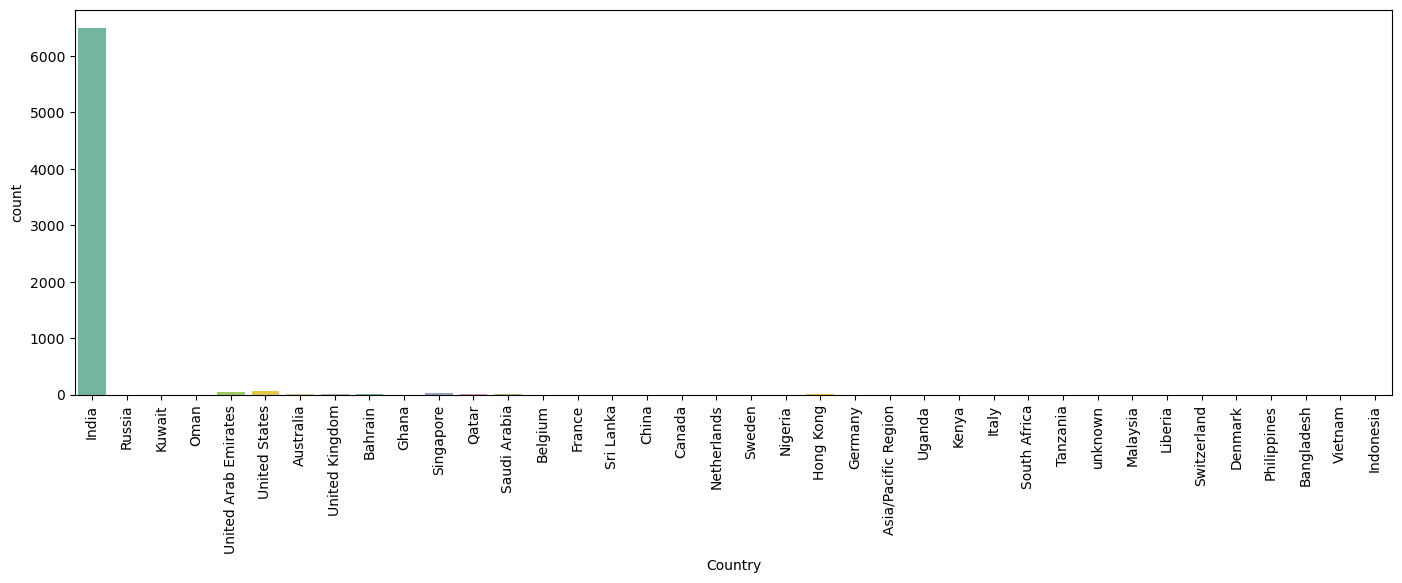

In [10]:
plt.figure(figsize=(17,5))
sns.countplot(x='Country',data=leads_df,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [11]:
leads_df['Country']=leads_df['Country'].fillna('India')


In [12]:
leads_df['Country'].isnull().sum()

0

#### Variable 'Specialization'

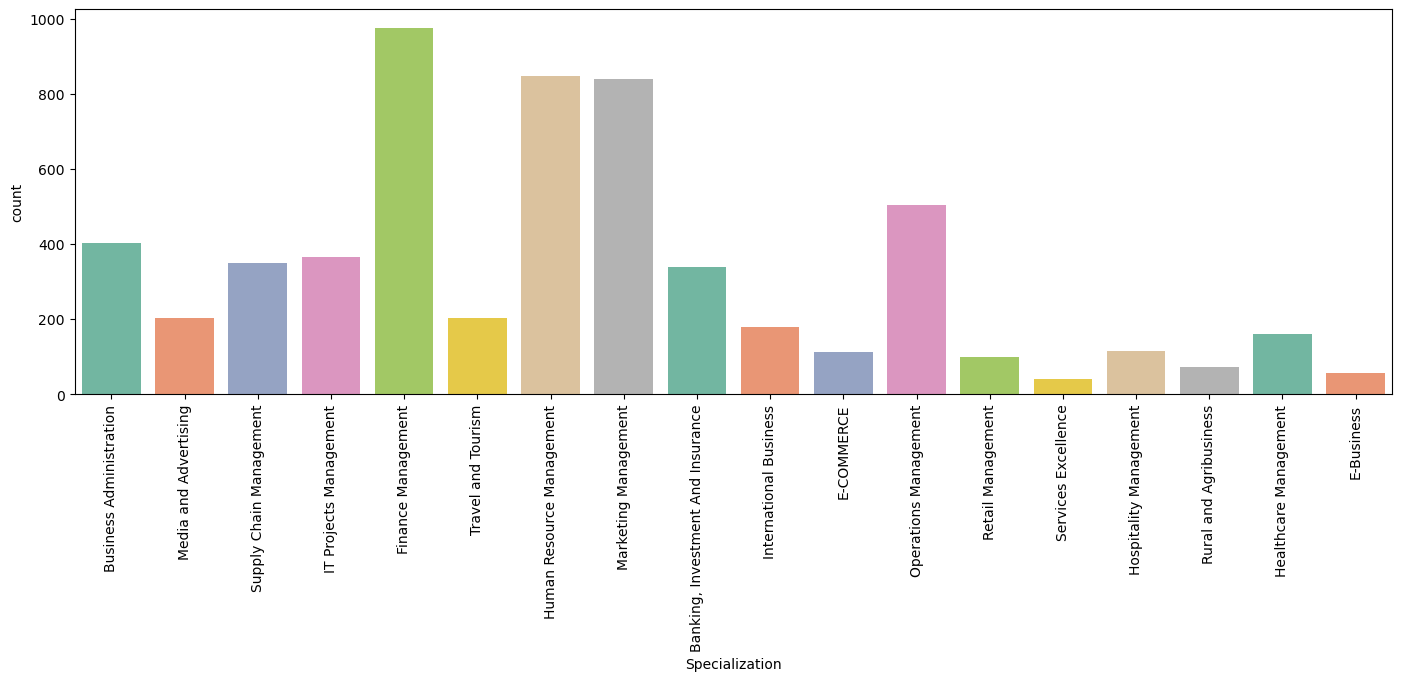

In [13]:
plt.figure(figsize=(17,5))
sns.countplot(x='Specialization',data=leads_df,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [14]:
leads_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [15]:
leads_df['Specialization']=leads_df['Specialization'].fillna('Others')

#### Variable 'What is your current occupation'

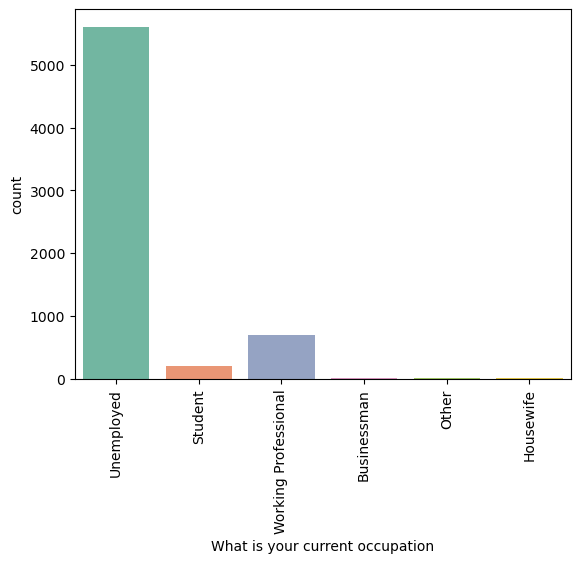

In [16]:
sns.countplot(x='What is your current occupation',data=leads_df,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [17]:
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Since most of the values are Unemployed the null values are imputed with Unemployed.

In [18]:
leads_df['What is your current occupation']=leads_df['What is your current occupation'].fillna('Unemployed')

#### Variable 'What matters most to you in choosing a course'

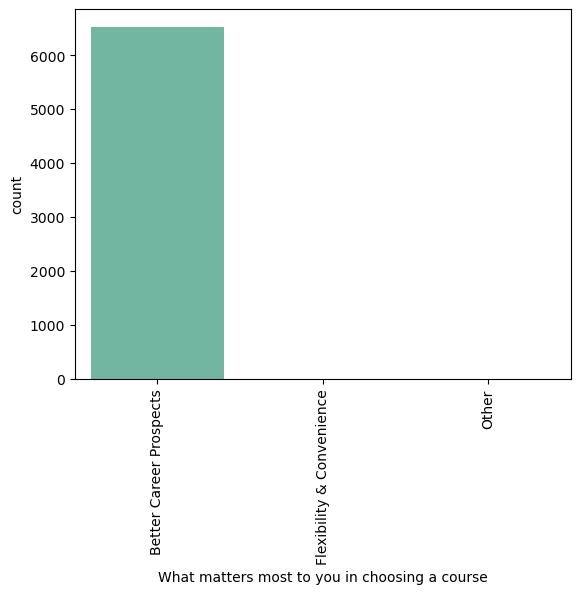

In [19]:
sns.countplot(x='What matters most to you in choosing a course',data=leads_df,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [20]:
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

The column is dropped due to the highly skewed distribution and the presence of large nnumber of missing values in the variable.

In [21]:
leads_df=leads_df.drop(['What matters most to you in choosing a course'],axis=1)

In [22]:
leads_df.shape

(9240, 29)

#### Variable 'Tags'

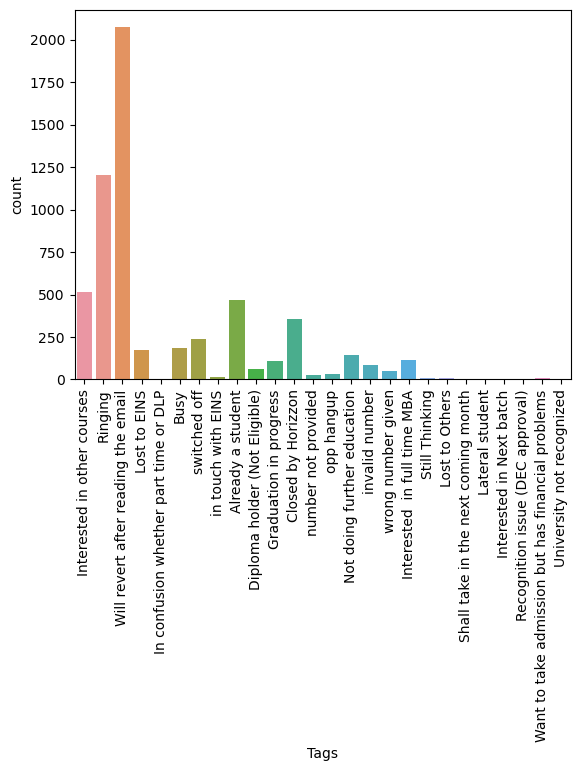

In [23]:
sns.countplot(x='Tags',data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [24]:
leads_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [25]:
leads_df['Tags']=leads_df['Tags'].fillna('Will revert after reading the email')

#### Variable 'City'

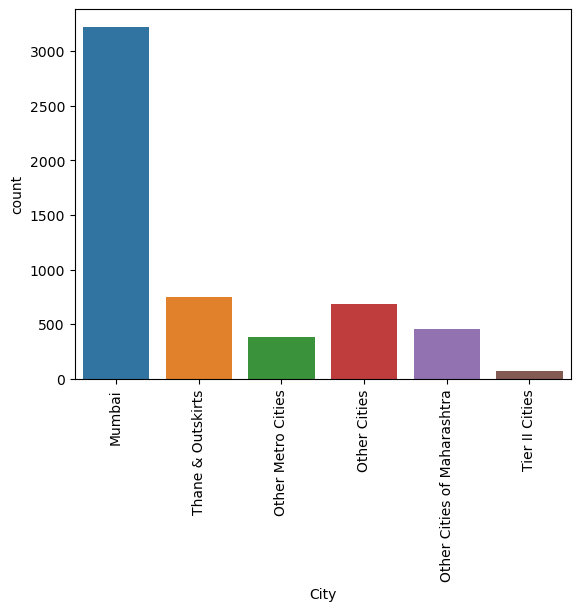

In [26]:
sns.countplot(x='City',data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [27]:
leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
leads_df['City']=leads_df['City'].fillna('Mumbai')

The missing values in the remaining columns are less than 2 % and hence the values are dropped 

In [29]:
leads_df.dropna(inplace=True)

In [30]:
leads_df.shape

(9074, 29)

In [31]:
## Checking Leads conversion rate
Converted=(leads_df['Converted'].sum()/len(leads_df))*100
Converted

37.85541106458012

In [32]:
for column in leads_df.columns:
    print("Column:",column)
    print(leads_df[column].value_counts())
    print()

Column: Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9074, dtype: int64

Column: Lead Number
660737    1
602411    1
602438    1
602435    1
602420    1
         ..
630128    1
630135    1
630139    1
630158    1
579533    1
Name: Lead Number, Length: 9074, dtype: int64

Column: Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

Column: Lead Source
Google               2868
Direct Traffic       2543
Olark Chat         

In [33]:
## Dropping off variables which are having imbalanced data 
leads_df=leads_df.drop(["Do Not Call","Magazine","Newspaper Article","X Education Forums","Newspaper","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)

### Data Visualization 

In [34]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Country                                 9074 non-null   obje

In [35]:
cat_cols=['Lead Origin','Lead Source','Do Not Email','Last Activity','Country','Specialization','What is your current occupation','Search','Digital Advertisement','Through Recommendations','Tags','City','A free copy of Mastering The Interview','Last Notable Activity']

### Bivariate plots

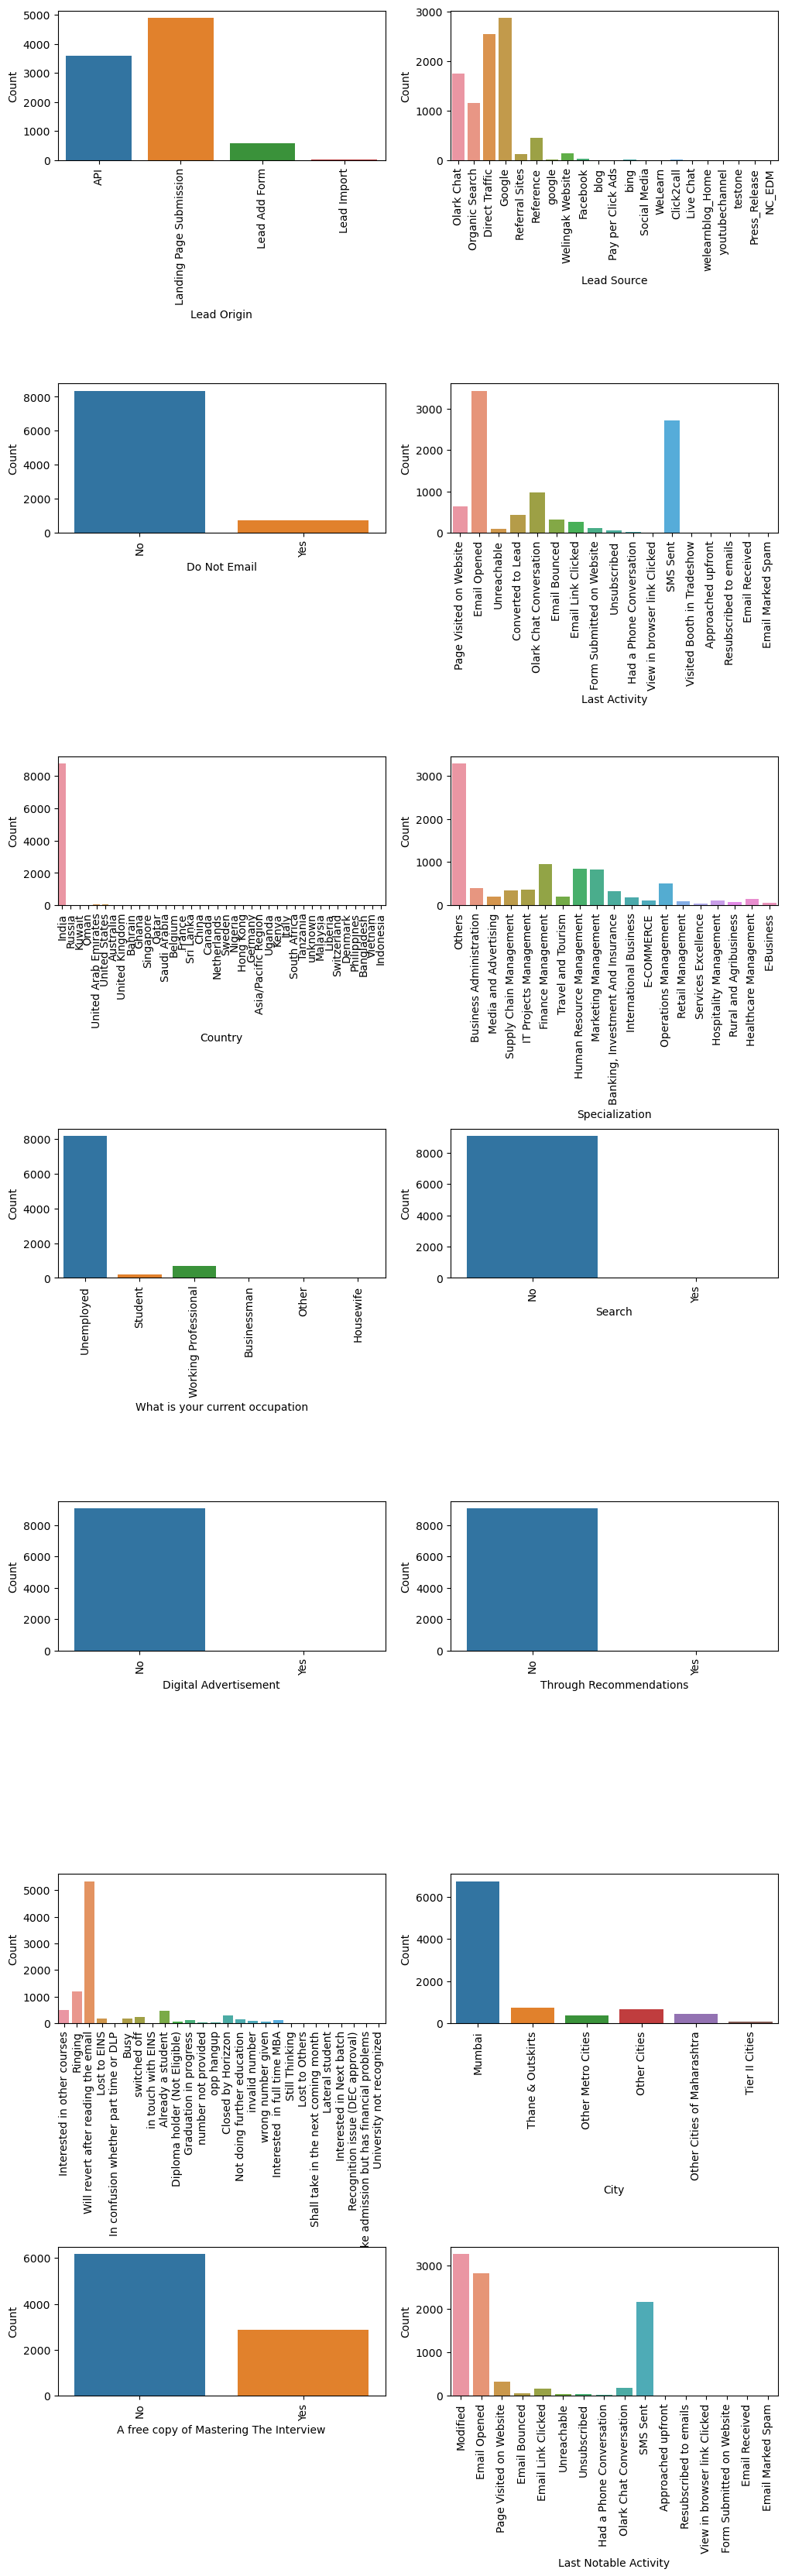

In [36]:
## Calculating number of rows and columns for the subplots
num_rows=len(cat_cols)//2
num_cols=2
## Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols,figsize=(12,40),gridspec_kw={'hspace':1.5})
axes=axes.flatten()

for i,col in enumerate(cat_cols):
    sns.countplot(x=col,data=leads_df, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)
# Hide any empty subplots
for j in range(len(cat_cols), num_rows*num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Creating Dummy variables for Categorical variables

In [37]:
dummy=pd.get_dummies(leads_df[cat_cols],drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
## Concatenating dummy variables
lead=pd.concat([leads_df,dummy],axis=1)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [39]:
## Dropping Categorical variables
lead=lead.drop(leads_df[cat_cols],axis=1)
lead.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Checking for Outliers

#### Variable 'TotalVisits'

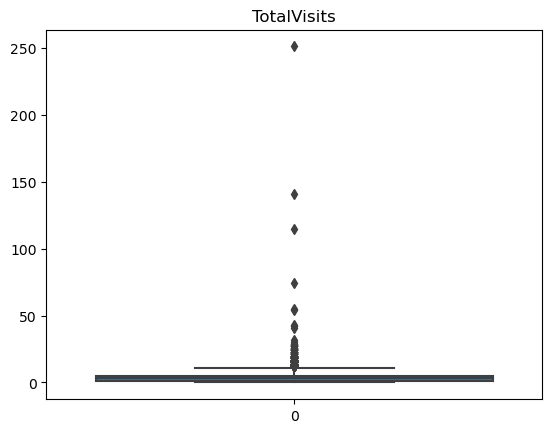

In [40]:
sns.boxplot(lead['TotalVisits'])
plt.title('TotalVisits')
plt.show()

In [41]:
## Removing the outliers
Q1=lead["TotalVisits"].quantile(0.25)
Q3=lead["TotalVisits"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
lead["TotalVisits"]=lead["TotalVisits"].clip(upper=upper_bound,lower=lower_bound)

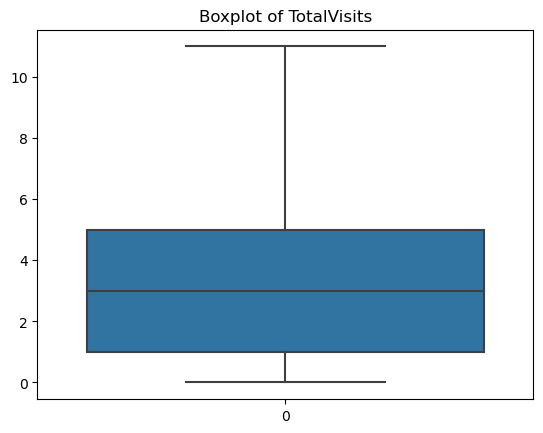

In [42]:
sns.boxplot(lead["TotalVisits"])
plt.title("Boxplot of TotalVisits")
plt.show()

#### Variable 'Total Time Spent on Website'

In [43]:
lead['Total Time Spent on Website']=lead["Total Time Spent on Website"].astype('float')

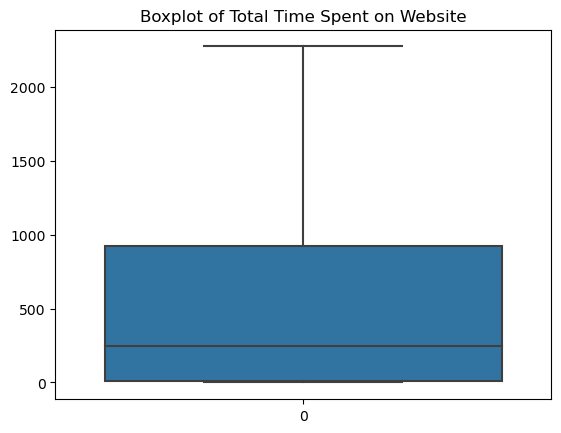

In [44]:
sns.boxplot(lead['Total Time Spent on Website'])
plt.title('Boxplot of Total Time Spent on Website')
plt.show()

#### Variable 'Page Views Per Visit'

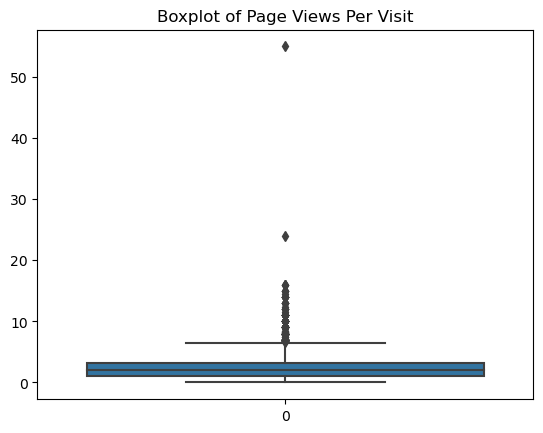

In [45]:
sns.boxplot(lead['Page Views Per Visit'])
plt.title('Boxplot of Page Views Per Visit')
plt.show()

In [46]:
## Removing the outliers
Q1=lead["Page Views Per Visit"].quantile(0.25)
Q3=lead["Page Views Per Visit"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
lead["Page Views Per Visit"]=lead["Page Views Per Visit"].clip(upper=upper_bound,lower=lower_bound)

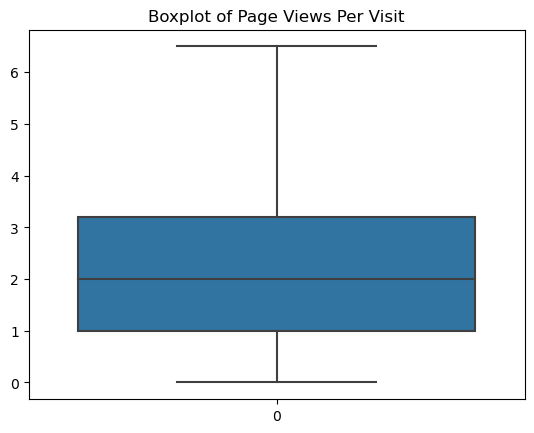

In [47]:
sns.boxplot(lead['Page Views Per Visit'])
plt.title('Boxplot of Page Views Per Visit')
plt.show()

### Test-Train Split

In [48]:
X=lead.drop(['Prospect ID','Lead Number','Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674.0,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532.0,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305.0,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428.0,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
y=lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6351, 152) (6351,)
(2723, 152) (2723,)


### Feature Scaling

In [51]:
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.431325,-0.160255,-0.161929,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.431325,-0.540048,-0.161929,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-1.124566,-0.888650,-1.247280,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,-0.431325,1.643304,-0.161929,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.608537,2.017593,0.109409,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Model building 

In [52]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6204
Model Family:                Binomial   Df Model:                          146
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 19 Feb 2024   Deviance:                       91182.
Time:                        20:52:39   Pearson chi2:                 4.46e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1.093e+16   1.09e+08   9.99e+07      0.000    1.09e+16    1.09e+16
TotalVisits                                            -5.041e+13   1.43e+06  -3.53e+07      0.000   -5.04e+13   -5.04e+13
Total Time Spent on Website                              3.22e+14   1.02e+06   3.16e+08      0.000    3.22e+14    3.22e+14
Page Views Per Visit                                    4.489e+12   1.56e+06   2.87e+06      0.000    4.49e+12    4.49e+12
Lead Origin_Landing Page Submission                    -2.526e+14    3.4e+06  -7.43e+07      0.000   -2.53e+14   -2.53e+14
Lead Origin_Lead Add Form                              -1.265e+15   4.77e+07  -2.65e+07      0.000   -1.27e+15   -1.27e+15
Lead Origin_Lead Import                                 3.886e+15   7.28e+07   5.34e+07      0.000    3.89e+15    3.89e+15
Lead Source_Direct Traffic                             -2.275e+15   6.27e+07  -3.63e+07      0.000   -2.27e+15   -2.27e+15
Lead Source_Facebook                                   -5.714e+15    9.5e+07  -6.01e+07      0.000   -5.71e+15   -5.71e+15
Lead Source_Google                                      -2.37e+15   6.27e+07  -3.78e+07      0.000   -2.37e+15   -2.37e+15
Lead Source_Live Chat                                    6.02e+15   6.25e+07   9.63e+07      0.000    6.02e+15    6.02e+15
Lead Source_NC_EDM                                      1.457e+16   9.19e+07   1.59e+08      0.000    1.46e+16    1.46e+16
Lead Source_Olark Chat                                 -1.266e+15   6.26e+07  -2.02e+07      0.000   -1.27e+15   -1.27e+15
Lead Source_Organic Search                             -2.276e+15   6.28e+07  -3.63e+07      0.000   -2.28e+15   -2.28e+15
Lead Source_Pay per Click Ads                          -7.002e+14    9.2e+07  -7.61e+06      0.000      -7e+14      -7e+14
Lead Source_Press_Release                              -4.551e+15   9.24e+07  -4.92e+07      0.000   -4.55e+15   -4.55e+15
Lead Source_Reference                                  -2.949e+14   4.07e+07  -7.24e+06      0.000   -2.95e+14   -2.95e+14
Lead Source_Referral Sites                             -2.037e+15   6.31e+07  -3.23e+07      0.000   -2.04e+15   -2.04e+15
Lead Source_Social Media                               -5.892e+14   7.88e+07  -7.48e+06      0.000   -5.89e+14   -5.89e+14
Lead Source_WeLearn                                       86.1117   9.11e-07   9.45e+07      0.000      86.112      86.112
Lead Source_Welingak Website                            1.965e+13   4.12e+07   4.77e+05      0.000    1.97e+13    1.97e+13
Lead Source_bing                                       -3.253e+15   7.38e+07  -4.41e+07      0.000   -3.25e+15   -3.25e+15
Lead Sou

The logisticc regression model was developed using all the predictor variables and it is shown that there are many insignificant variable whose probability level is greater than 0.05. Hence significant variables are selected using RFE 

### Feature Selection using RFE

In [53]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
from sklearn.feature_selection import RFE 
rfe=RFE(logreg,n_features_to_select=20)
rfe= rfe.fit(X_train,y_train)

In [54]:
rfe.support_

array([False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False,

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 70),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 68),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Facebook', False, 123),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 84),
 ('Lead Source_NC_EDM', False, 60),
 ('Lead Source_Olark Chat', False, 44),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Pay per Click Ads', False, 126),
 ('Lead Source_Press_Release', False, 69),
 ('Lead Source_Reference', False, 37),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Social Media', False, 45),
 ('Lead Source_WeLearn', False, 131),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 113),
 ('Lead Source_blog', False, 30),
 ('Lead Source_google', False, 29),
 ('Lead Source_testone', False, 122),
 ('Lead Source_welearnblog_Home', Fal

In [56]:
col=X_train.columns[rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [57]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train[col],family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1946.9
Date:                Mon, 19 Feb 2024   Deviance:                       3893.8
Time:                        20:53:04   Pearson chi2:                 1.08e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5132
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Lead Origin_Landing Page Submission                     -1.5928      0.138    -11.512      0.000      -1.864      -1.322
Lead Origin_Lead Add Form                                1.5799      0.323      4.890      0.000       0.947       2.213
Lead Source_Welingak Website                             2.8133      0.810      3.472      0.001       1.225       4.401
Do Not Email_Yes                                        -1.8328      0.210     -8.732      0.000      -2.244      -1.421
Last Activity_Had a Phone Conversation                   2.7818      1.015      2.742      0.006       0.793       4.771
Last Activity_Unsubscribed                               2.6094      0.545      4.791      0.000       1.542       3.677
Specialization_Others                                   -2.2818      0.142    -16.028      0.000      -2.561      -2.003
What is your current occupation_Unemployed              -2.5419      0.208    -12.197      0.000      -2.950      -2.133
What is your current occupation_Working Professional     0.0983      0.293      0.335      0.738      -0.477       0.674
Tags_Busy                                                2.8170      0.310      9.087      0.000       2.209       3.425
Tags_Closed by Horizzon                                  8.2525      0.745     11.080      0.000       6.793       9.712
Tags_Interested in Next batch                           26.6411   5.35e+04      0.000      1.000   -1.05e+05    1.05e+05
Tags_Lateral student                                    28.3314   7.67e+04      0.000      1.000    -1.5e+05     1.5e+05
Tags_Lost to EINS                                        8.2098      0.747     10.985      0.000       6.745       9.675
Tags_Ringing                                            -1.3742      0.322     -4.274      0.000      -2.004      -0.744
Tags_Will revert after reading the email                 3.5762      0.207     17.277      0.000       3.170       3.982
Tags_invalid number                                    -21.8262   1.46e+04     -0.001      0.999   -2.86e+04    2.86e+04
Tags_switched off                                       -1.2718      0.565     -2.252      0.024      -2.379      -0.165
Tags_wrong number given                                -21.6690   1.98e+04     -0.001      0.999   -3.88e+04    3.88e+04
Last Notable Activity_SMS Sent                           2.8861      0.116     24.806      0.000       2.658       3.114
========================================================================================================================
"""

In [58]:
## Checking VIF values of the feature variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Lead Source_Welingak Website,1.39
10,Tags_Closed by Horizzon,1.33
17,Tags_switched off,1.18
9,Tags_Busy,1.15
13,Tags_Lost to EINS,1.12
5,Last Activity_Unsubscribed,1.08
16,Tags_invalid number,1.07
18,Tags_wrong number given,1.03
4,Last Activity_Had a Phone Conversation,1.01
11,Tags_Interested in Next batch,1.01


Since the p value of Tags_Lateral student is very high, this column is dropped

In [59]:
col=col.drop('Tags_Lateral student',1)
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [60]:
## Model 3 
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1946.5
Date:                Mon, 19 Feb 2024   Deviance:                       3893.1
Time:                        20:53:05   Pearson chi2:                 1.10e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5133
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1129      0.333     -3.341      0.001      -1.766      -0.460
Lead Origin_Landing Page Submission                     -1.3817      0.148     -9.315      0.000      -1.672      -1.091
Lead Origin_Lead Add Form                                1.7381      0.321      5.415      0.000       1.109       2.367
Lead Source_Welingak Website                             2.6424      0.809      3.266      0.001       1.057       4.228
Do Not Email_Yes                                        -1.8247      0.210     -8.701      0.000      -2.236      -1.414
Last Activity_Had a Phone Conversation                   2.7770      1.013      2.740      0.006       0.791       4.763
Last Activity_Unsubscribed                               2.5992      0.548      4.743      0.000       1.525       3.673
Specialization_Others                                   -2.0776      0.151    -13.763      0.000      -2.374      -1.782
What is your current occupation_Unemployed              -1.7152      0.305     -5.631      0.000      -2.312      -1.118
What is your current occupation_Working Professional     0.9517      0.378      2.518      0.012       0.211       1.692
Tags_Busy                                                2.9183      0.316      9.246      0.000       2.300       3.537
Tags_Closed by Horizzon                                  8.3266      0.747     11.150      0.000       6.863       9.790
Tags_Interested in Next batch                           26.7374   5.39e+04      0.000      1.000   -1.06e+05    1.06e+05
Tags_Lost to EINS                                        8.2878      0.750     11.058      0.000       6.819       9.757
Tags_Ringing                                            -1.2881      0.327     -3.939      0.000      -1.929      -0.647
Tags_Will revert after reading the email                 3.6728      0.216     17.035      0.000       3.250       4.095
Tags_invalid number                                    -21.7385   1.46e+04     -0.001      0.999   -2.87e+04    2.86e+04
Tags_switched off                                       -1.1776      0.567     -2.076      0.038      -2.289      -0.066
Tags_wrong number given                                -21.5844   1.98e+04     -0.001      0.999   -3.89e+04    3.88e+04
Last Notable Activity_SMS Sent                           2.8812      0.116     24.748      0.000       2.653       3.109
========================================================================================================================
"""

The probability value of Tags_Interested in Next batch is very high and hence the variable is dropped  

In [61]:
col=col.drop('Tags_Interested in Next batch',1)
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [62]:
## Model 4 
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1952.6
Date:                Mon, 19 Feb 2024   Deviance:                       3905.2
Time:                        20:53:05   Pearson chi2:                 1.09e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5123
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0588      0.327     -3.237      0.001      -1.700      -0.418
Lead Origin_Landing Page Submission                     -1.3837      0.148     -9.375      0.000      -1.673      -1.094
Lead Origin_Lead Add Form                                1.7348      0.319      5.433      0.000       1.109       2.361
Lead Source_Welingak Website                             2.6340      0.808      3.261      0.001       1.051       4.217
Do Not Email_Yes                                        -1.7873      0.208     -8.594      0.000      -2.195      -1.380
Last Activity_Had a Phone Conversation                   2.7819      1.014      2.745      0.006       0.795       4.768
Last Activity_Unsubscribed                               2.5596      0.545      4.695      0.000       1.491       3.628
Specialization_Others                                   -2.0768      0.150    -13.818      0.000      -2.371      -1.782
What is your current occupation_Unemployed              -1.6734      0.300     -5.581      0.000      -2.261      -1.086
What is your current occupation_Working Professional     0.9718      0.373      2.603      0.009       0.240       1.704
Tags_Busy                                                2.8106      0.310      9.075      0.000       2.204       3.418
Tags_Closed by Horizzon                                  8.2308      0.744     11.061      0.000       6.772       9.689
Tags_Lost to EINS                                        8.1899      0.747     10.967      0.000       6.726       9.654
Tags_Ringing                                            -1.4036      0.321     -4.377      0.000      -2.032      -0.775
Tags_Will revert after reading the email                 3.5739      0.207     17.298      0.000       3.169       3.979
Tags_invalid number                                    -21.8528   1.46e+04     -0.001      0.999   -2.86e+04    2.86e+04
Tags_switched off                                       -1.2953      0.564     -2.298      0.022      -2.400      -0.191
Tags_wrong number given                                -21.7007   1.98e+04     -0.001      0.999   -3.88e+04    3.88e+04
Last Notable Activity_SMS Sent                           2.9050      0.117     24.909      0.000       2.676       3.134
========================================================================================================================
"""

The probability value of 'Tags_invalid number' is high and hence the column is dropped. 

In [63]:
col=col.drop('Tags_invalid number',1)
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [64]:
## Model 5
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1957.0
Date:                Mon, 19 Feb 2024   Deviance:                       3914.0
Time:                        20:53:05   Pearson chi2:                 1.11e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5117
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1312      0.334     -3.391      0.001      -1.785      -0.477
Lead Origin_Landing Page Submission                     -1.4025      0.148     -9.462      0.000      -1.693      -1.112
Lead Origin_Lead Add Form                                1.7478      0.321      5.452      0.000       1.119       2.376
Lead Source_Welingak Website                             2.6167      0.808      3.239      0.001       1.033       4.200
Do Not Email_Yes                                        -1.7832      0.208     -8.591      0.000      -2.190      -1.376
Last Activity_Had a Phone Conversation                   2.7792      1.013      2.745      0.006       0.794       4.764
Last Activity_Unsubscribed                               2.5527      0.545      4.687      0.000       1.485       3.620
Specialization_Others                                   -2.0879      0.151    -13.829      0.000      -2.384      -1.792
What is your current occupation_Unemployed              -1.7417      0.305     -5.708      0.000      -2.340      -1.144
What is your current occupation_Working Professional     0.9380      0.380      2.468      0.014       0.193       1.683
Tags_Busy                                                2.9836      0.306      9.744      0.000       2.384       3.584
Tags_Closed by Horizzon                                  8.3855      0.744     11.273      0.000       6.928       9.843
Tags_Lost to EINS                                        8.3459      0.746     11.181      0.000       6.883       9.809
Tags_Ringing                                            -1.2211      0.316     -3.858      0.000      -1.841      -0.601
Tags_Will revert after reading the email                 3.7316      0.205     18.213      0.000       3.330       4.133
Tags_switched off                                       -1.1094      0.561     -1.978      0.048      -2.209      -0.010
Tags_wrong number given                                -20.5175    1.2e+04     -0.002      0.999   -2.36e+04    2.36e+04
Last Notable Activity_SMS Sent                           2.8728      0.115     25.026      0.000       2.648       3.098
========================================================================================================================
"""

Since the probability value of 'Tags_wrong number given' is high and hence the column is dropped.

In [65]:
col=col.drop('Tags_wrong number given',1)
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [66]:
## Model 6 
X_train_sm=sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1958.8
Date:                Mon, 19 Feb 2024   Deviance:                       3917.6
Time:                        20:53:05   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5114
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1606      0.336     -3.450      0.001      -1.820      -0.501
Lead Origin_Landing Page Submission                     -1.4107      0.149     -9.500      0.000      -1.702      -1.120
Lead Origin_Lead Add Form                                1.7529      0.321      5.458      0.000       1.123       2.382
Lead Source_Welingak Website                             2.6103      0.808      3.230      0.001       1.026       4.194
Do Not Email_Yes                                        -1.7848      0.207     -8.611      0.000      -2.191      -1.379
Last Activity_Had a Phone Conversation                   2.7783      1.012      2.745      0.006       0.794       4.762
Last Activity_Unsubscribed                               2.5598      0.546      4.690      0.000       1.490       3.629
Specialization_Others                                   -2.0921      0.151    -13.830      0.000      -2.389      -1.796
What is your current occupation_Unemployed              -1.7695      0.307     -5.757      0.000      -2.372      -1.167
What is your current occupation_Working Professional     0.9245      0.383      2.415      0.016       0.174       1.675
Tags_Busy                                                3.0540      0.305     10.018      0.000       2.456       3.651
Tags_Closed by Horizzon                                  8.4488      0.744     11.360      0.000       6.991       9.906
Tags_Lost to EINS                                        8.4098      0.746     11.269      0.000       6.947       9.873
Tags_Ringing                                            -1.1475      0.315     -3.644      0.000      -1.765      -0.530
Tags_Will revert after reading the email                 3.7958      0.204     18.589      0.000       3.396       4.196
Tags_switched off                                       -1.0343      0.560     -1.847      0.065      -2.132       0.063
Last Notable Activity_SMS Sent                           2.8608      0.114     25.055      0.000       2.637       3.085
========================================================================================================================
"""

Since the probability value of Tags_switched off is high, the variable is dropped.

In [67]:
col=col.drop('Tags_switched off',1)
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [68]:
## Model 7
X_train_sm=sm.add_constant(X_train[col])
logm7=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1960.9
Date:                Mon, 19 Feb 2024   Deviance:                       3921.8
Time:                        20:53:06   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5111
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2481      0.343     -3.639      0.000      -1.920      -0.576
Lead Origin_Landing Page Submission                     -1.4290      0.149     -9.580      0.000      -1.721      -1.137
Lead Origin_Lead Add Form                                1.7699      0.323      5.485      0.000       1.137       2.402
Lead Source_Welingak Website                             2.5919      0.809      3.205      0.001       1.007       4.177
Do Not Email_Yes                                        -1.7860      0.207     -8.640      0.000      -2.191      -1.381
Last Activity_Had a Phone Conversation                   2.7752      1.012      2.744      0.006       0.793       4.758
Last Activity_Unsubscribed                               2.5711      0.548      4.690      0.000       1.497       3.645
Specialization_Others                                   -2.1049      0.152    -13.850      0.000      -2.403      -1.807
What is your current occupation_Unemployed              -1.8450      0.313     -5.899      0.000      -2.458      -1.232
What is your current occupation_Working Professional     0.8870      0.391      2.270      0.023       0.121       1.653
Tags_Busy                                                3.2487      0.294     11.065      0.000       2.673       3.824
Tags_Closed by Horizzon                                  8.6258      0.741     11.645      0.000       7.174      10.078
Tags_Lost to EINS                                        8.5887      0.743     11.555      0.000       7.132      10.045
Tags_Ringing                                            -0.9443      0.303     -3.118      0.002      -1.538      -0.351
Tags_Will revert after reading the email                 3.9761      0.192     20.699      0.000       3.600       4.353
Last Notable Activity_SMS Sent                           2.8295      0.112     25.196      0.000       2.609       3.050
========================================================================================================================
"""

In [69]:
## Checking VIF values of the feature variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Lead Source_Welingak Website,1.38
10,Tags_Closed by Horizzon,1.29
9,Tags_Busy,1.12
11,Tags_Lost to EINS,1.10
5,Last Activity_Unsubscribed,1.08
4,Last Activity_Had a Phone Conversation,1.01
8,What is your current occupation_Working Profes...,0.85
1,Lead Origin_Lead Add Form,0.75
3,Do Not Email_Yes,0.58
13,Tags_Will revert after reading the email,0.18


All the predictor variables are significant having probability value less than 0.05.The Variance Inflation factor values of all the predictor variables are less than 5 indicating no multicollinearity issues and hence we can proceed with making predictions using the model.

### Model Evaluation

In [70]:
from sklearn import metrics

In [71]:
## Model prediction on train data
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.366783
1012    0.153833
9226    0.002146
4750    0.907494
7987    0.983152
1281    0.907494
2880    0.366783
4971    0.951895
7536    0.366783
1248    0.004209
dtype: float64

In [72]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred

array([0.36678258, 0.15383292, 0.00214552, ..., 0.17611735, 0.06433957,
       0.01074925])

In [73]:
y_train_pred_final=pd.DataFrame({'Converted_actual':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID']=y_train.index
y_train_pred_final.head()

,Converted_actual,Converted_prob,Prospect ID
0,0,0.366783,3009
1,0,0.153833,1012
2,0,0.002146,9226
3,1,0.907494,4750
4,1,0.983152,7987


#### Optimal Cutoff point

In [74]:
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Converted_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted_actual,Converted_prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.366783,3009,1,1,1,1,0,0,0,0,0,0
1,0,0.153833,1012,1,1,0,0,0,0,0,0,0,0
2,0,0.002146,9226,1,0,0,0,0,0,0,0,0,0
3,1,0.907494,4750,1,1,1,1,1,1,1,1,1,1
4,1,0.983152,7987,1,1,1,1,1,1,1,1,1,1


In [75]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_actual, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.720831  0.975470  0.561332
0.2   0.2  0.735475  0.973835  0.586172
0.3   0.3  0.836089  0.883483  0.806402
0.4   0.4  0.872304  0.741210  0.954417
0.5   0.5  0.872304  0.737122  0.956978
0.6   0.6  0.872461  0.732216  0.960307
0.7   0.7  0.871201  0.725675  0.962356
0.8   0.8  0.856558  0.669665  0.973624
0.9   0.9  0.806330  0.523712  0.983355


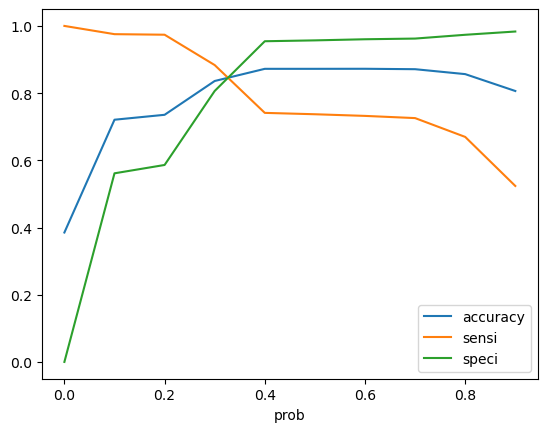

In [76]:
## Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above plot it is observed that 0.3 is the optimum probability cut-off point.

In [77]:
y_train_pred_final['Predicted']=y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.35 else 0)
y_train_pred_final.head()

,Converted_actual,Converted_prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,0,0.366783,3009,1,1,1,1,0,0,0,0,0,0,1
1,0,0.153833,1012,1,1,0,0,0,0,0,0,0,0,0
2,0,0.002146,9226,1,0,0,0,0,0,0,0,0,0,0
3,1,0.907494,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.983152,7987,1,1,1,1,1,1,1,1,1,1,1


In [78]:
## Confusion matrix
confusion_matrix=metrics.confusion_matrix(y_train_pred_final.Converted_actual,y_train_pred_final.Predicted)
confusion_matrix

array([[3152,  753],
       [ 285, 2161]], dtype=int64)

In [79]:
## Model Accuracy check
print("Accuracy =",metrics.accuracy_score(y_train_pred_final.Converted_actual,y_train_pred_final.Predicted))

Accuracy = 0.83656117146906


In [80]:
## Recall and Precision
print("Recall =",metrics.recall_score(y_train_pred_final.Converted_actual,y_train_pred_final.Predicted))
print("Precision =",metrics.precision_score(y_train_pred_final.Converted_actual,y_train_pred_final.Predicted))

Recall = 0.883483237939493
Precision = 0.74159231297186


In [95]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [96]:
# Sensitivity of test data
TP / float(TP+FN)

0.883483237939493

In [97]:
# Specificity of test data
TN / float(TN+FP)

0.8071702944942382

In [102]:
## Plotting the ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_actual, y_train_pred_final.Predicted, drop_intermediate = False )

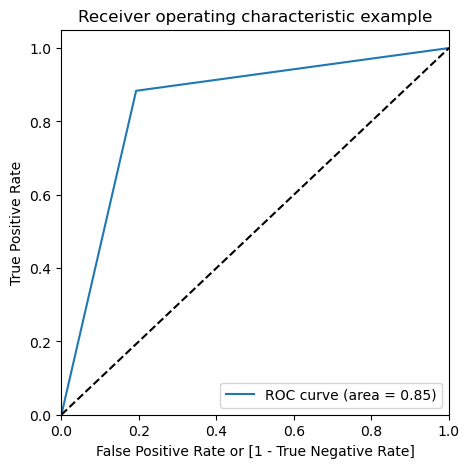

In [104]:
draw_roc(y_train_pred_final.Converted_actual, y_train_pred_final.Predicted)

The area under curve for ROC is 0.85 which indicates a strong predictive model performance.

#### Precision and Recall trade-off 

In [81]:
from sklearn.metrics import precision_recall_curve

In [82]:
y_train_pred_final.Converted_actual,y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted_actual, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [83]:
y_train_pred_final.Converted_actual, y_train_pred_final.Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_actual, y_train_pred_final.Converted_prob)

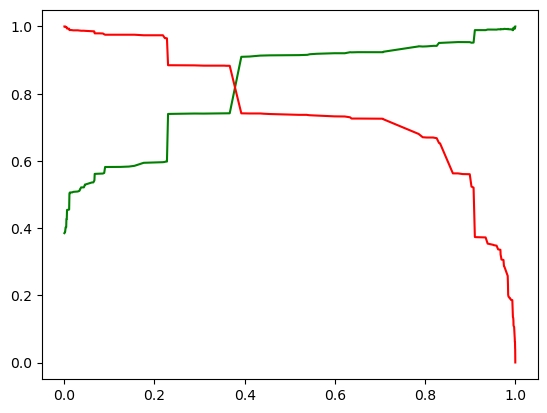

In [84]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [85]:
## Model Predictions on the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test=X_test[col]

In [86]:
X_test_sm=sm.add_constant(X_test)
y_test_pred=res.predict(X_test_sm)
y_test_pred[:10]

3271    0.227603
1490    0.898987
7936    0.227603
4216    0.999894
3830    0.366783
1800    0.898987
6507    0.066800
4821    0.010749
4223    0.966992
4714    0.227603
dtype: float64

In [87]:
y_test_pred=y_test_pred.values.reshape(-1)
y_test_pred


array([0.22760346, 0.89898676, 0.22760346, ..., 0.98414741, 0.36678258,
       0.36678258])

In [88]:
y_test_pred_final=pd.DataFrame()
y_test_pred_final['Predicted_prob']=pd.DataFrame(y_test_pred)
y_test_pred_final['Converted']=pd.DataFrame(y_test.values)
y_test_pred_final['Prospect ID']=pd.DataFrame(y_test.index)
y_test_pred_final['Lead_Score'] = y_test_pred_final.Predicted_prob.map( lambda x: round(x*100))
y_test_pred_final['Predicted']=y_test_pred_final.Predicted_prob.map(lambda x:1 if x>0.35 else 0)
y_test_pred_final.head()

,Predicted_prob,Converted,Prospect ID,Lead_Score,Predicted
0,0.227603,0,3271,23,0
1,0.898987,1,1490,90,1
2,0.227603,0,7936,23,0
3,0.999894,1,4216,100,1
4,0.366783,0,3830,37,1


In [89]:
## Confusion matrix
from sklearn import metrics
confusion_matrix1=metrics.confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_matrix1


array([[1386,  348],
       [ 136,  853]], dtype=int64)

In [90]:
print("Accuracy =",metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted))
print("Recall =",metrics.recall_score(y_test_pred_final.Converted,y_test_pred_final.Predicted))
print("Precision =",metrics.precision_score(y_test_pred_final.Converted,y_test_pred_final.Predicted))

Accuracy = 0.8222548659566654
Recall = 0.8624873609706775
Precision = 0.7102414654454621


In [91]:
TP = confusion_matrix1[1,1] # true positive 
TN = confusion_matrix1[0,0] # true negatives
FP = confusion_matrix1[0,1] # false positives
FN = confusion_matrix1[1,0] # false negatives

In [92]:
# Sensitivity of test data
TP / float(TP+FN)

0.8624873609706775

In [93]:
# Specificity of test data
TN / float(TN+FP)

0.7993079584775087

In [105]:
# Top three variables in your model which contribute most towards the probability of a lead getting converted
res.params.sort_values(ascending=False)

Tags_Closed by Horizzon                                 8.625788
Tags_Lost to EINS                                       8.588664
Tags_Will revert after reading the email                3.976067
Tags_Busy                                               3.248710
Last Notable Activity_SMS Sent                          2.829453
Last Activity_Had a Phone Conversation                  2.775202
Lead Source_Welingak Website                            2.591917
Last Activity_Unsubscribed                              2.571093
Lead Origin_Lead Add Form                               1.769893
What is your current occupation_Working Professional    0.887027
Tags_Ringing                                           -0.944264
const                                                  -1.248066
Lead Origin_Landing Page Submission                    -1.429012
Do Not Email_Yes                                       -1.786006
What is your current occupation_Unemployed             -1.845034
Specialization_Others    

### Observation

In [ ]:
After making predictions on the train data, the Model evaluation metrics are 
Accuracy     - 0.83
Sensivity    - 0.88
Specificity  - 0.81

After making predictions on the test data, the Model evaluation metrics are 
Accuracy     - 0.82
Sensivity    - 0.86
Specificity  - 0.80


### Conclusion

The model performs consistently well on both the train and test datasets, with accuracies around 0.82-0.83, it demonstrates a strong overall predictive capability.
Sensitivity and specificity scores above 0.80 reflect the model's ability to effectively identify both positive and negative cases.

The top three variables in the model that contribute most to the probability of a lead getting converted are Tags_Closed by Horizzon, Tags_Lost to EINS, and Tags_Will revert after reading the email. These variables indicates varying degrees of readiness and potential for conversion, influencing the overall likelihood of a lead becoming a customer.